In [3]:
! pip3 install pandas pycoingecko matplotlib scipy seaborn
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import datetime as dt
import time
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pycoingecko import CoinGeckoAPI
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.filters.hp_filter import hpfilter
cg = CoinGeckoAPI()

In [4]:
tweet_date = "2018-07-18 01:58:00"
coin='dogecoin'
date_format = "%Y-%m-%d %H:%M:%S"
#1 day from current time will produce 5min interval
#1-90 hourly interval
#above 90 days is daily
number_of_days = 45
number_of_hours = 0
tweet_datetime = pd.to_datetime(tweet_date,format=date_format)
tweet_from_timestamp = (tweet_datetime - dt.timedelta(days=number_of_days,hours=number_of_hours)).timestamp()
tweet_to_timestamp = (tweet_datetime + dt.timedelta(days=number_of_days,hours=number_of_hours)).timestamp()

In [5]:
coin_gecko_data = cg.get_coin_market_chart_range_by_id(id=coin,
                                                vs_currency='usd',
                                                from_timestamp=tweet_from_timestamp,
                                                to_timestamp=tweet_to_timestamp)

In [6]:
def get_nth_element():
    return l[1]
parsed_data = {}
timestamps=list(map(lambda x:x[0],coin_gecko_data['prices']))
for key in coin_gecko_data.keys():
    parsed_data[key] = list(map(lambda x:x[1], coin_gecko_data[key]))
parsed_data['timestamps']=timestamps

In [7]:
df=pd.DataFrame(parsed_data)

In [8]:
df

,prices,market_caps,total_volumes,timestamps
0,0.003536,4.055510e+08,4.630466e+06,1527994004375
1,0.003537,4.056969e+08,4.647641e+06,1527997602273
2,0.003545,4.066036e+08,3.931993e+06,1528001218261
3,0.003531,4.050303e+08,3.953584e+06,1528004802445
4,0.003599,4.127919e+08,4.105703e+06,1528008405184
...,...,...,...,...
2242,0.004353,5.045204e+08,9.432780e+07,1535752613499
2243,0.004681,5.441599e+08,1.103172e+08,1535756208582
2244,0.004888,5.665088e+08,1.244128e+08,1535759822095
2245,0.004526,5.248419e+08,1.259893e+08,1535763418165


In [9]:
df['timestamps'].head()

0    1527994004375
1    1527997602273
2    1528001218261
3    1528004802445
4    1528008405184
Name: timestamps, dtype: int64

In [10]:
df['date']=pd.to_datetime(df['timestamps'],origin='unix',unit='ms')

In [11]:
df[['prices','market_caps','total_volumes','timestamps','date']].to_csv('./dogecoin_usd_elon.csv',index=False)

In [12]:
def is_after_tweet(tweet_dt):
    def i_a_t(date):
        if date < tweet_dt:
            return 0
        elif date > tweet_dt: 
            return 1
        else:
            pass
    return i_a_t

In [13]:
is_after_mapper = is_after_tweet(tweet_datetime)
df['before_after']=df['date'].map(is_after_mapper)

In [14]:
def gen_days_since(tweet_dt):
    def generate(date):
        diff = date - tweet_dt
        return  diff.days + (diff.seconds / (3600 * 24))
    return generate

In [15]:
gen_days_since(tweet_datetime)

<function __main__.gen_days_since.<locals>.generate(date)>

In [16]:
mapper = gen_days_since(tweet_datetime)
df['days_since_tweet']=df['date'].map(mapper)

In [17]:
df

,prices,market_caps,total_volumes,timestamps,date,before_after,days_since_tweet
0,0.003536,4.055510e+08,4.630466e+06,1527994004375,2018-06-03 02:46:44.375,0,-44.966157
1,0.003537,4.056969e+08,4.647641e+06,1527997602273,2018-06-03 03:46:42.273,0,-44.924514
2,0.003545,4.066036e+08,3.931993e+06,1528001218261,2018-06-03 04:46:58.261,0,-44.882662
3,0.003531,4.050303e+08,3.953584e+06,1528004802445,2018-06-03 05:46:42.445,0,-44.841181
4,0.003599,4.127919e+08,4.105703e+06,1528008405184,2018-06-03 06:46:45.184,0,-44.799479
...,...,...,...,...,...,...,...
2242,0.004353,5.045204e+08,9.432780e+07,1535752613499,2018-08-31 21:56:53.499,1,44.832558
2243,0.004681,5.441599e+08,1.103172e+08,1535756208582,2018-08-31 22:56:48.582,1,44.874167
2244,0.004888,5.665088e+08,1.244128e+08,1535759822095,2018-08-31 23:57:02.095,1,44.915995
2245,0.004526,5.248419e+08,1.259893e+08,1535763418165,2018-09-01 00:56:58.165,1,44.957616


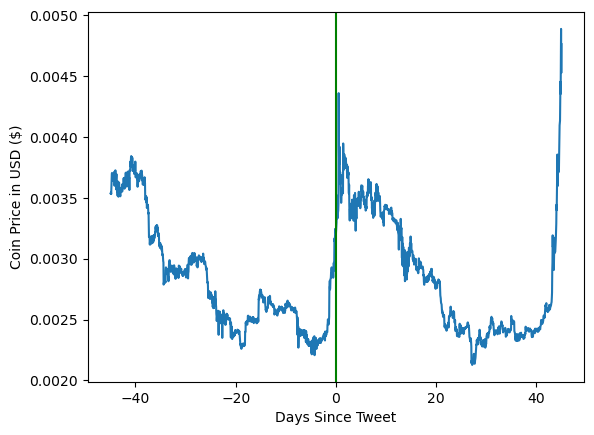

In [18]:
df.plot(x='days_since_tweet',y='prices',legend=False,ylabel='Coin Price in USD ($)',xlabel='Days Since Tweet')
plt.axvline(0,color='green')

In [19]:
max_price =max(df['prices'])

In [20]:
min_price = min(df['prices'])

In [21]:
def min_max(price):
    return (price - min_price)/(max_price-min_price)

In [22]:
df['min_max_prices']=df['prices'].map(min_max)

In [23]:
df

,prices,market_caps,total_volumes,timestamps,date,before_after,days_since_tweet,min_max_prices
0,0.003536,4.055510e+08,4.630466e+06,1527994004375,2018-06-03 02:46:44.375,0,-44.966157,0.510243
1,0.003537,4.056969e+08,4.647641e+06,1527997602273,2018-06-03 03:46:42.273,0,-44.924514,0.510704
2,0.003545,4.066036e+08,3.931993e+06,1528001218261,2018-06-03 04:46:58.261,0,-44.882662,0.513567
3,0.003531,4.050303e+08,3.953584e+06,1528004802445,2018-06-03 05:46:42.445,0,-44.841181,0.508599
4,0.003599,4.127919e+08,4.105703e+06,1528008405184,2018-06-03 06:46:45.184,0,-44.799479,0.533107
...,...,...,...,...,...,...,...,...
2242,0.004353,5.045204e+08,9.432780e+07,1535752613499,2018-08-31 21:56:53.499,1,44.832558,0.806386
2243,0.004681,5.441599e+08,1.103172e+08,1535756208582,2018-08-31 22:56:48.582,1,44.874167,0.925052
2244,0.004888,5.665088e+08,1.244128e+08,1535759822095,2018-08-31 23:57:02.095,1,44.915995,1.000000
2245,0.004526,5.248419e+08,1.259893e+08,1535763418165,2018-09-01 00:56:58.165,1,44.957616,0.868973


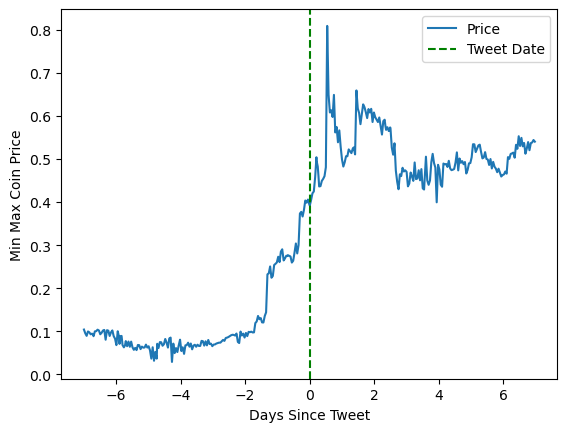

In [25]:
sub_interval_df = df[(df['days_since_tweet'] >= -7) & (df['days_since_tweet'] <= 7)]
sub_interval_df.plot(x='days_since_tweet',y='min_max_prices',legend=False,ylabel='Min Max Coin Price',xlabel='Days Since Tweet')
plt.axvline(0,color='green',linestyle='--')
plt.legend(('Price','Tweet Date'))


[Text(1, 0, 'Coin Prices After Tweet')]

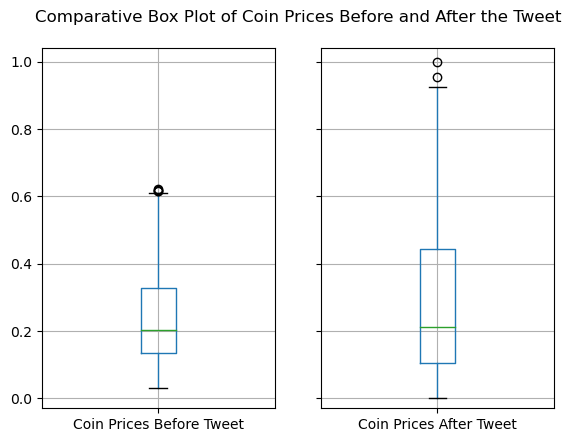

In [27]:
axes=df.groupby(by='before_after').boxplot(column='min_max_prices',subplots=True)
axes[0].set_title('')
axes[1].set_title('')

#I don't know how we can compare visually two things are different scales so it may not be the best idea to group them. 
#We may wanna do each seperately to be more readable. Anyway, I have chosen a scale in which none of the boxplots are cut off.
axes[0].set_ylim(-0.03,1)
axes[1].set_ylim(-0.03,1.04)

plt.suptitle('Comparative Box Plot of Coin Prices Before and After the Tweet')
axes[0].set_xticklabels(['Coin Prices Before Tweet'])
axes[1].set_xticklabels(['Coin Prices After Tweet'])

In [28]:
#Just to see how the interval changes
print(min(df['prices']), "to", max(df['prices']))
print(min(df['min_max_prices']), "to", max(df['min_max_prices']))

0.002126913278760765 to 0.004888079629415554
0.0 to 1.0


In [31]:
df_comparative = df.groupby(by='before_after')['min_max_prices'].describe()
df_comparative

,count,mean,std,min,25%,50%,75%,max
before_after,,,,,,,,
0,1123.0,0.255862,0.159852,0.028964,0.133064,0.201600,0.326151,0.621033
1,1124.0,0.263844,0.181133,0.000000,0.104616,0.211124,0.443224,1.000000


In [32]:
pct_mean_change= (((df_comparative['mean'].loc[1])-(df_comparative['mean'].loc[0]))/(df_comparative['mean'].loc[0]))*100
pct_max_change= (((df_comparative['max'].loc[1])-(df_comparative['max'].loc[0]))/(df_comparative['max'].loc[0]))*100
print("There is a:", pct_mean_change, "% increase in the mean value of prices (min_max_prices)")
print("There is a:", pct_max_change, "% increase in the maximum value of prices (min_max_prices)")


There is a: 3.119827879237273 % increase in the mean value of prices (min_max_prices)
There is a: 61.02192732064918 % increase in the maximum value of prices (min_max_prices)


In [33]:
df['min_max_prices'].autocorr(lag=1)

0.9946675869394264

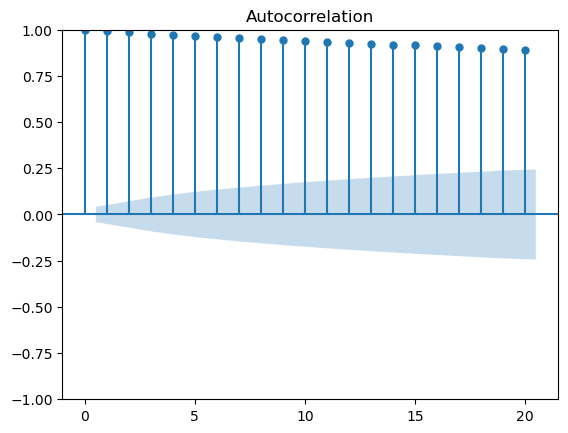

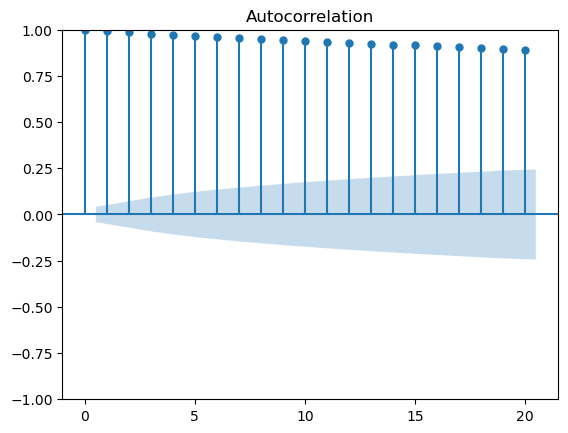

In [34]:
plot_acf(df['min_max_prices'],lags=20)

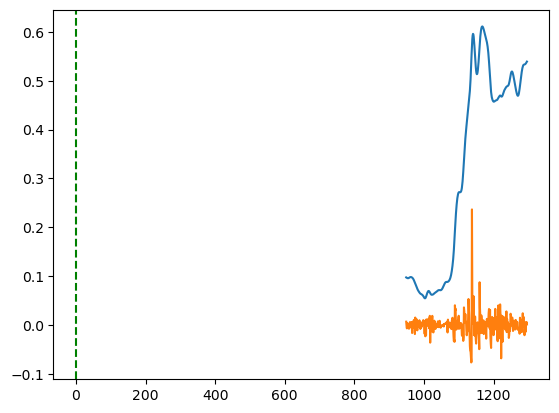

In [43]:
#Detrending the demand shock using Hodrick-Prescott filter: y(t) = T(t) + C(t) assumption
Price_cycle, Price_trend = hpfilter(sub_interval_df['min_max_prices'], lamb=100,)
plt.axvline(0,color='green',linestyle='--')
plt.plot(Price_trend)
plt.plot(Price_cycle)

In [44]:
#Reactivity measurement. Here I just get the time intervall between the Tweet and the peak (the min_max_prices)
#Once we have different cases, we can update this list which we'll constitute a set we can then alayze and compare with other assets.
reactivity_times = []

for i in range(0,348):
    if df['min_max_prices'].loc[i]==1:
        reactivity_times.append(df['days_since_tweet'].loc[i])
print(reactivity_times)


[]


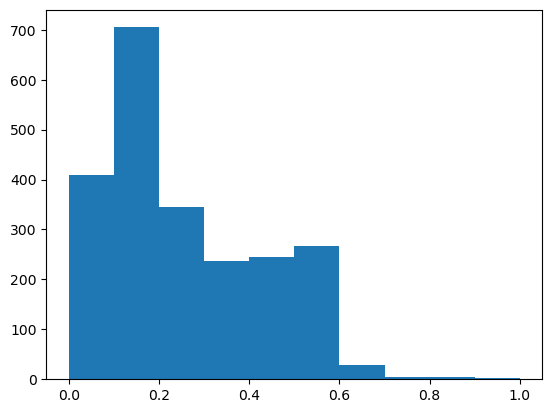

In [46]:
#Plot the distribution of our cases' Prices' fluctuation
#Let say we have a DataFrame with all of our price variations Delta expressed as the difference between the maximums (or the means) before and after the tweet.
#
df_before=df[df['before_after']==0] 

plt.hist(df['min_max_prices']) # plot a histogram of the income variable
plt.show() # show the plot